In [ ]:
#convert dicom to png
import os
import pydicom
import numpy as np
import cv2

# Định dạng thư mục
input_dcm_folder = "datasets/ct_dicom"
output_png_folder = "datasets/ct_images/HR"

os.makedirs(output_png_folder, exist_ok=True)

for file in os.listdir(input_dcm_folder):
    if file.endswith(".dcm"):
        # Đọc ảnh DICOM
        dicom_path = os.path.join(input_dcm_folder, file)
        ds = pydicom.dcmread(dicom_path)
        img = ds.pixel_array

        # Chuẩn hóa về khoảng [0, 255]
        img = (img - img.min()) / (img.max() - img.min()) * 255.0
        img = img.astype(np.uint8)

        # Lưu ảnh PNG
        output_path = os.path.join(output_png_folder, file.replace(".dcm", ".png"))
        cv2.imwrite(output_path, img)

print("Chuyển đổi DICOM -> PNG hoàn tất!")


In [ ]:
#downsampling (giam do phan giai buc anh) 
import cv2
import os

input_folder = "datasets/ct_images/HR"
output_folder = "datasets/ct_images/LR"

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    img = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)
    img_lr = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(output_folder, filename), img_lr)

print("Tạo ảnh LR hoàn tất!")


In [ ]:
# them nhieu gausian

import numpy as np

def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

for filename in os.listdir(output_folder):
    img = cv2.imread(os.path.join(output_folder, filename), cv2.IMREAD_GRAYSCALE)
    img_noisy = add_gaussian_noise(img)
    cv2.imwrite(os.path.join(output_folder, filename), img_noisy)

print("Thêm nhiễu Gaussian hoàn tất!")


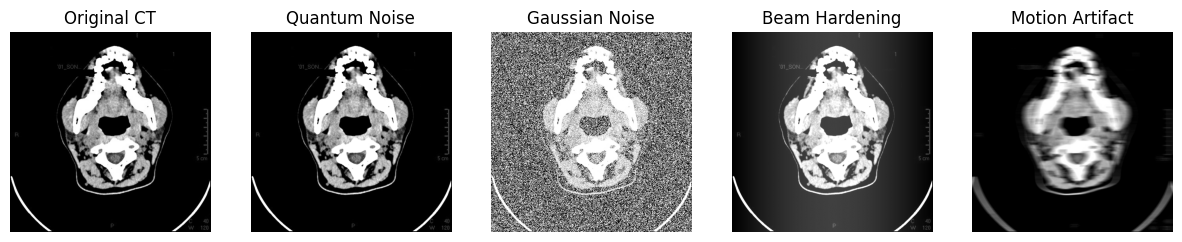

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_quantum_noise(image, intensity=0.05):
    noise = np.random.poisson(image * intensity).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

def add_gaussian_noise(image, mean=0, var=10):
    sigma = var ** 0.7
    gaussian = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, gaussian)
    return noisy_image

def add_beam_hardening_artifact(image, strength=0.3):
    rows, cols = image.shape
    artifact = np.zeros_like(image, dtype=np.float32)
    for i in range(rows):
        artifact[i, :] = np.sin(np.linspace(0, np.pi, cols)) * 255 * strength
    artifact = artifact.astype(np.uint8)
    noisy_image = cv2.addWeighted(image, 1, artifact, 0.5, 0)
    return noisy_image

def add_motion_artifact(image, kernel_size=15):
    kernel = np.zeros((kernel_size, kernel_size))
    kernel[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
    kernel = kernel / kernel_size
    motion_blur = cv2.filter2D(image, -1, kernel)
    return motion_blur

# Load the CT image
image_path = './datasets/ct_images/HR/image_s0001_i0001.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply different noise types
quantum_noisy = add_quantum_noise(image, intensity=0.05)
gaussian_noisy = add_gaussian_noise(image, var=20)
beam_hardening_noisy = add_beam_hardening_artifact(image, strength=0.5)
motion_artifact_noisy = add_motion_artifact(image, kernel_size=20)

# Display the images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original CT")
axes[1].imshow(quantum_noisy, cmap='gray')
axes[1].set_title("Quantum Noise")
axes[2].imshow(gaussian_noisy, cmap='gray')
axes[2].set_title("Gaussian Noise")
axes[3].imshow(beam_hardening_noisy, cmap='gray')
axes[3].set_title("Beam Hardening")
axes[4].imshow(motion_artifact_noisy, cmap='gray')
axes[4].set_title("Motion Artifact")

for ax in axes:
    ax.axis("off")

plt.show()
